<a href="https://colab.research.google.com/github/jeffblackadar/image_work/blob/master/deep_learning_r_page28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code without visible output:

This program is from:
François Chollet, J. J. Allaire, Deep Learning with R, January 2018  ISBN 9781617295546, Manning Publications, 
https://www.manning.com/books/deep-learning-with-r.



 int [1:60000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
 int [1:60000(1d)] 5 0 4 1 9 2 1 3 1 4 ...
 int [1:10000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
 int [1:10000(1d)] 7 2 1 0 4 1 4 9 5 9 ...


[1] 60000    28    28

[1] "slice:"


[1] 90 28 28

[1] "slice more detailed notation:"


[1] 90 28 28

[1] "\"For instance, in order to select 14 × 14 pixels in the bottom-right corner of all images, you do this:\""


[1] 60000    14    14

[1] "my_slice <- train_images[10:99,,] ...[10:99 is the batch axis or batch dimension"


[1] 60000   784

[1] "integer"

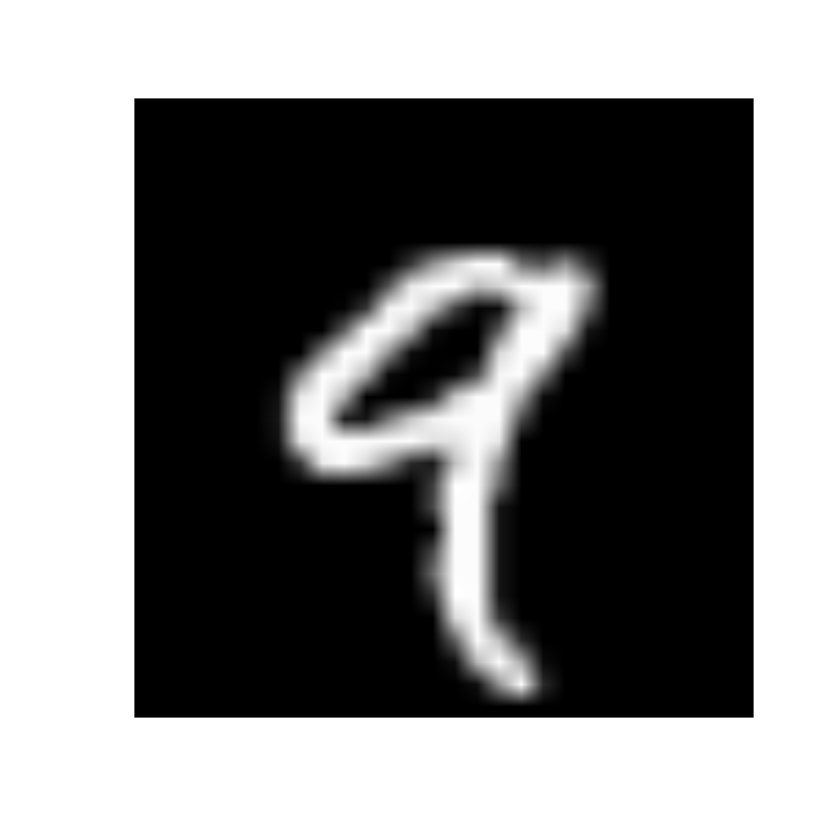

In [29]:

#install.packages("keras")
library(keras)
mnist <- dataset_mnist()
train_images <- mnist$train$x
train_labels <- mnist$train$y
test_images <- mnist$test$x
test_labels <- mnist$test$y
str(train_images)
str(train_labels)
str(test_images)
str(test_labels)

network <- keras_model_sequential() %>% layer_dense(units = 512, activation = "relu", input_shape = c(28*28)) %>% layer_dense(units=10,activation="softmax")

network %>% compile (optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = c("accuracy"))

dim(train_images)
print("slice:")
my_slice <- train_images[10:99,,]
dim(my_slice)
print("slice more detailed notation:")
my_slice <- train_images[10:99,1:28,1:28]
dim(my_slice)

print('"For instance, in order to select 14 × 14 pixels in the bottom-right corner of all images, you do this:"')
my_slice <- train_images[, 15:28, 15:28]
dim(my_slice)

print('my_slice <- train_images[10:99,,] ...[10:99 is the batch axis or batch dimension')

digit <- train_images[5,,]
plot(as.raster(digit, max=255))

train_images <- array_reshape(train_images,c(60000,28*28))
dim(train_images)
typeof(train_images)
train_images <- train_images / 255
test_images <- array_reshape(test_images,c(10000,28*28))
test_images <- test_images / 255

train_labels <- to_categorical(train_labels)
test_labels <- to_categorical(test_labels)






In [0]:
network %>% fit(train_images, train_labels, epochs=5,batch_size=128)


In [7]:
metrics <- network %>% evaluate(test_images, test_labels)
metrics

$loss
[1] 0.1181731

$acc
[1] 0.9816

In [10]:
network %>% predict_classes(test_images[11:20,])

[1] 0 6 9 0 1 5 9 7 3 4

Vector

Rank: 1, 1D tensor, Axis: 1





In [11]:

x <- c(12,3,6,14,10)
str(x)
dim(as.array(x))


 num [1:5] 12 3 6 14 10


[1] 5

Matrix

Rank: 2, 2D tensor, Axes: 2 (rows, columns)

Data: "Vector data"—2D tensors of shape (samples, features)


In [14]:
x <- matrix(rep(4,3*5),nrow = 3, ncol = 5)
x
dim(x)

4,4,4,4,4
4,4,4,4,4
4,4,4,4,4


[1] 3 5

Cube

Rank: 3, 3D tensor, Axes: 3 (rows, columns, depth)

Data: Timeseries data or sequence data—3D tensors of shape (samples, timesteps,
features)

In [16]:
x <- array(rep(9,2*3*2),dim = c(2,3,2))
str(x)
dim(x)


 num [1:2, 1:3, 1:2] 9 9 9 9 9 9 9 9 9 9 ...


[1] 2 3 2

Images—4D tensors of shape (samples, height, width, channels) or (samples,
channels, height, width)

Video—5D tensors of shape (samples, frames, height, width, channels) or
(samples, frames, channels, height, width)
